<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/backward/Lab_Backward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Backward


*   Mauricio Calderón
*   



##### 1. Pase el proceso completo del backward de la red neuronal de la figura en latex.

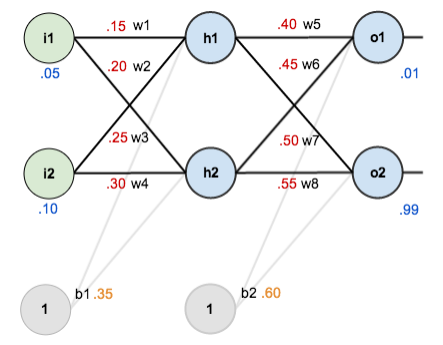

##### 2. Calcule paso a paso todas las derivadas necesarias para el desarrollo del backward utilizando el algoritmo del descenso del gradiente.

##### 3. Programe la red neuronal de la figura del punto 1 sin utilizar métodos ya preexistentes, es decir, programe todo el algoritmo desde cero (sólo el backward). Reutilice el código del forward del laboratorio anterior. Debe usar operaciones con matrices y un mínimo de fors. Prográmelo de forma que sea parametrizable (iteraciones=10000, Alpha=0.5) y pueda hacer el cálculo para cualquier red. Puede modificar la cantidad de iteraciones para determinar si el algoritmo converge

In [ ]:
import numpy as np

def sigmoid(x):
  
    # Función de activación sigmoide 
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Derivada de la función de activación sigmoide
    return sigmoid(x) * (1 - sigmoid(x))

def initialize_parameters(layer_dims):
    """
    Inicializa los parámetros de la red neuronal.

    layer_dims: lista que contiene el número de unidades en cada capa de la red neuronal.
    Retorna un diccionario que contiene los parámetros 'W' y 'b' para cada capa.
    """
    parameters = {}
    L = len(layer_dims)  # Número de capas de la red neuronal

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

def forward_propagation(X, parameters):
    """
    Realiza la propagación hacia adelante (forward propagation) para calcular las activaciones de cada capa.

    X: matriz de entrada de tamaño (n_features, m)
    parameters: diccionario que contiene los parámetros 'W' y 'b' para cada capa.

    Retorna un diccionario que contiene las activaciones y las entradas lineales de cada capa.
    """
    caches = {}
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        Z = np.dot(parameters['W' + str(l)], A) + parameters['b' + str(l)]
        A = sigmoid(Z)
        caches['Z' + str(l)] = Z
        caches['A' + str(l)] = A

    Z = np.dot(parameters['W' + str(L)], A) + parameters['b' + str(L)]
    AL = sigmoid(Z)
    caches['Z' + str(L)] = Z
    caches['A' + str(L)] = AL

    return AL, caches

def compute_cost(AL, Y):
    """
    Calcula el costo de la red neuronal.

    AL: matriz de activaciones de la última capa de tamaño (1, m)
    Y: matriz de etiquetas verdaderas de tamaño (1, m)

    Retorna el costo (un escalar).
    """
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    cost = np.squeeze(cost)

    return cost

def backward_propagation(AL, Y, caches):
    """
    Realiza la retropropagación (backward propagation) para calcular los gradientes de los parámetros.

    AL: matriz de activaciones de la última capa de tamaño (1, m)
    Y: matriz de etiquetas verdaderas de tamaño (1, m)
    caches: diccionario que contiene las activaciones y las entradas lineales de cada capa.

    Retorna un diccionario que contiene los gradientes 'dW' y 'db' para cada capa.
    """
    grads = {}

##### 4. Saque conclusiones de los ejercicios realizados que incluya cambios en la cantidad de iteraciones, cambios en el Alpha, otros que considere importantes